# Avaliação técnica - Gabriel Negrelli

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8, 8]

## Leitura e condicionamento dos dados

Primeiro, eh realizada a leitura dos dados disponibilizados no [kaggle](https://www.kaggle.com/uciml/electric-power-consumption-data-set). Os campos preenchidos com o valor `?` sao considerados como sendo `NaN`. As colunas contendo a data e o horario das medidas sao unidos em uma soh coluna e interpretados como sendo do tipo`pandas.datetime`.

In [2]:
df = pd.read_csv('./electric-power-consumption-data-set/household_power_consumption.txt', sep=';', 
                 na_values='?', parse_dates=[['Date', 'Time']])

Em seguida, as colunas sao renomeadas para melhor compreensao dos dados contidos no dataset. Alem disso, a coluna contendo os horarios das medidas eh utilizada como indice do dataframe.

In [3]:
columns = {
    'Date_Time': 'Timestamp',
    'Global_active_power': 'P [kW]', 
    'Global_reactive_power': 'Q [kW]', 
    'Voltage': 'V [V]', 
    'Global_intensity': 'I [A]', 
    'Sub_metering_1': 'P_kitchen [Wh]', 
    'Sub_metering_2': 'P_laundry [Wh]', 
    'Sub_metering_3': 'P_heat [Wh]'
}

df.rename(columns=columns, inplace=True)

In [4]:
df.set_index('Timestamp', inplace=True)

Finalmente, sao criadas as segintes colunas com base nos dados presentes no dataset:

* P_rest [Wh]: Energia (em Wh) consumida no restante da casa.

* P [Wh]: Energia (em Wh) consumida na residencia.

* Q [Wh]: Energia reativa (em Wh) consumida na residencia.

* fp: fator de potencia em cada instante.

O dataframe resultante pode ser visto abaixo

In [5]:
df['P_rest [Wh]'] = df['P [kW]']*1000/60 - df['P_kitchen [Wh]'] - df['P_laundry [Wh]'] - df['P_heat [Wh]']
df['P [Wh]'] = df['P [kW]']*1000/60
df['Q [Wh]'] = df['Q [kW]']*1000/60
df['fp'] = df['P [Wh]']/np.sqrt(df['P [Wh]']**2 + df['Q [Wh]']**2)

In [6]:
df.head()

,P [kW],Q [kW],V [V],I [A],P_kitchen [Wh],P_laundry [Wh],P_heat [Wh],P_rest [Wh],P [Wh],Q [Wh],fp
Timestamp,,,,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667,70.266667,6.966667,0.995121
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333,89.333333,7.266667,0.996708
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667,89.566667,8.300000,0.995734
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000,89.800000,8.366667,0.995688
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000,61.100000,8.800000,0.989787


***

## Analise dos dados de consumo

Apos o condicionamento dos dados, pode-se iniciar analise do consumo na residencia. Foram feitas analises em relacao ao consumo durante o dia, a semana, nos meses do ano e durante os anos medidos.

### Consumo diario

Primeiramente, sao calculados os valores medios do consumo total da casa em cada instante do dia, assim como o consumo registrado por cada um dos tres medidores e o consumo do restante da casa.

In [7]:
minute_mean = df['P [Wh]'].groupby([df.index.hour, df.index.minute]).mean().to_dict()
minute_mean_kitchen = df['P_kitchen [Wh]'].groupby([df.index.hour, df.index.minute]).mean().to_dict()
minute_mean_laundry = df['P_laundry [Wh]'].groupby([df.index.hour, df.index.minute]).mean().to_dict()
minute_mean_heat = df['P_heat [Wh]'].groupby([df.index.hour, df.index.minute]).mean().to_dict()
minute_mean_rest = df['P_rest [Wh]'].groupby([df.index.hour, df.index.minute]).mean().to_dict()

Em seguida, os valores sao ordenados de acordo com o horario em que as medidas foram realizadas.

In [8]:
measures, measures_kitchen, measures_laundry, measures_heat, measures_rest, instants = [], [], [], [], [], []
for time in sorted(minute_mean.keys()):

    measures.append(minute_mean[time])
    
    instants.append('{:02d}:{:02d}'.format(time[0], time[1]))

    measures_kitchen.append(minute_mean_kitchen[time])
    measures_laundry.append(minute_mean_laundry[time])
    measures_heat.append(minute_mean_heat[time])
    measures_rest.append(minute_mean_rest[time])

Os dados obtidos para o consumo medio durante o dia na residencia podem ser melhor observados nos graficos abaixo.

Text(0,0.5,'P [Wh]')

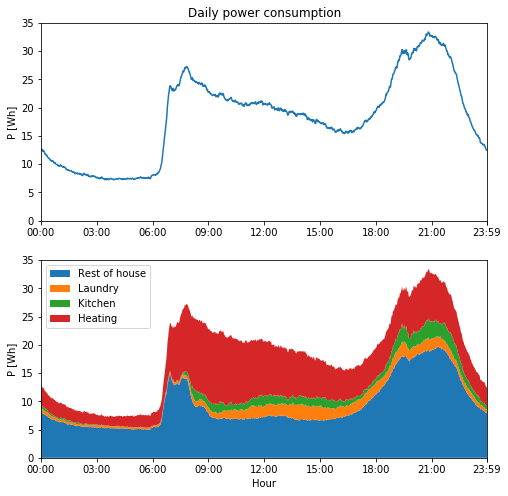

In [35]:
labels = ['Rest of house', 'Laundry', 'Kitchen', 'Heating/AC']

plt.subplot(2, 1, 1)
plt.plot(instants, measures)
plt.xticks(np.hstack((np.arange(0, 1441, 3*60), np.array([1439]))))
plt.xlim(0, 1440)
plt.ylim(0, 35)
plt.title('Daily power consumption')
plt.ylabel('P [Wh]')

plt.subplot(2, 1, 2)
plt.stackplot(instants, measures_rest, measures_laundry, measures_kitchen, measures_heat, labels=labels)
plt.legend(loc='upper left')
plt.xticks(np.hstack((np.arange(0, 1441, 3*60), np.array([1439]))))
plt.xlim(0, 1440)
plt.ylim(0, 35)
plt.xlabel('Hour')
plt.ylabel('P [Wh]')

Podemos ver que o consumo se mantem relativamente baixo durante as primeiras horas do dia, mas, por volta de 7h, ha um aumento expressivo do consumo de energia, principalmente pelos equipamentos de aquecimento de agua e ar condicionado. Tambem ha um aumento do consumo de energia nos outros comodos da residencia por volta deste horario. Isso eh devido ao fato deste ser o horario em que os moradores acordam, tomam banho, ligam TV's, computadores, etc.

A partir da 9h, o consumo de energia volta a cair, devido a saida dos moradores para o trabalho e/ou escola. O consumo volta a crescer por volta das 17h, horario em que os moradores retornam a residencia. Alem disso, ja comeca a ser necessaria a iluminacao aritifical em alguns comodos. Tambem ha um aumento no consumo de energia para aquecimento de agua e ar condicionado, provavelmente por conta de chuveiros eletricos. Apos as 22h, conforme os moradores vao dormindo, o consumo diminui novamente.

#### Inverno x Verao

In [68]:
jun = df[df.index.month == 6]
dec = df[df.index.month == 12]

jun_kitchen = jun['P_kitchen [Wh]'].groupby([jun.index.hour, jun.index.minute]).mean().to_dict()
jun_laundry = jun['P_laundry [Wh]'].groupby([jun.index.hour, jun.index.minute]).mean().to_dict()
jun_heat = jun['P_heat [Wh]'].groupby([jun.index.hour, jun.index.minute]).mean().to_dict()
jun_rest = jun['P_rest [Wh]'].groupby([jun.index.hour, jun.index.minute]).mean().to_dict()

dec_kitchen = dec['P_kitchen [Wh]'].groupby([dec.index.hour, dec.index.minute]).mean().to_dict()
dec_laundry = dec['P_laundry [Wh]'].groupby([dec.index.hour, dec.index.minute]).mean().to_dict()
dec_heat = dec['P_heat [Wh]'].groupby([dec.index.hour, dec.index.minute]).mean().to_dict()
dec_rest = dec['P_rest [Wh]'].groupby([dec.index.hour, dec.index.minute]).mean().to_dict()

jun_kitchen_measures, jun_laundry_measures, jun_heat_measures, jun_rest_measures = [], [], [], []
dec_kitchen_measures, dec_laundry_measures, dec_heat_measures, dec_rest_measures = [], [], [], []
for time in sorted(jun_rest.keys()):
    
    jun_kitchen_measures.append(jun_kitchen[time])
    jun_laundry_measures.append(jun_laundry[time])
    jun_heat_measures.append(jun_heat[time])
    jun_rest_measures.append(jun_rest[time])
    
    dec_kitchen_measures.append(dec_kitchen[time])
    dec_laundry_measures.append(dec_laundry[time])
    dec_heat_measures.append(dec_heat[time])
    dec_rest_measures.append(dec_rest[time])

# labels = ['Summer days', 'Winter days']
# plt.plot(instants, summer_measures, label='Summer days')
# plt.plot(instants, winter_measures, label='Winter days')
# plt.legend()

Text(0,0.5,'P [Wh]')

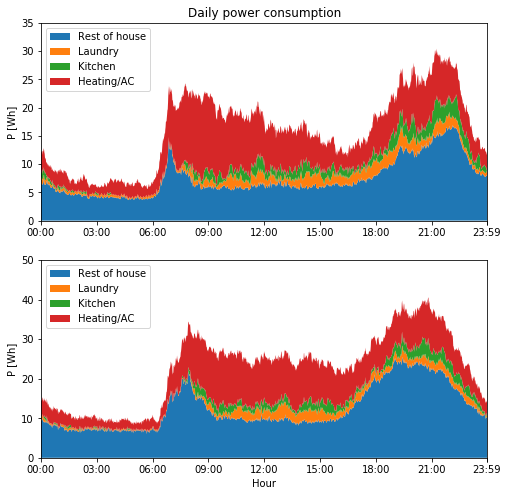

In [70]:
labels = ['Rest of house', 'Laundry', 'Kitchen', 'Heating/AC']

plt.subplot(2, 1, 1)
plt.stackplot(instants, jun_rest_measures, jun_laundry_measures, jun_kitchen_measures, jun_heat_measures, labels=labels)
plt.legend(loc='upper left')
plt.xticks(np.hstack((np.arange(0, 1441, 3*60), np.array([1439]))))
plt.xlim(0, 1440)
plt.ylim(0, 35)
plt.title('Daily power consumption')
plt.ylabel('Winter Consumption [Wh]')

plt.subplot(2, 1, 2)
plt.stackplot(instants, dec_rest_measures, dec_laundry_measures, dec_kitchen_measures, dec_heat_measures, labels=labels)
plt.legend(loc='upper left')
plt.xticks(np.hstack((np.arange(0, 1441, 3*60), np.array([1439]))))
plt.xlim(0, 1440)
plt.ylim(0, 50)
plt.xlabel('Hour')
plt.ylabel('Consumo durante o inverno [Wh]')

In [10]:
hourly_mean = df['P [kW]'].groupby(df.index.hour).mean().to_dict()
daily_mean = df['P [kW]'].groupby(df.index.day).mean().to_dict()
week_mean = df['P [kW]'].groupby(df.index.weekday).mean().to_dict()
monthly_mean = df['P [kW]'].groupby(df.index.month).mean().to_dict()
yearly_mean = df['P [kW]'].groupby(df.index.year).mean().to_dict()

In [11]:
qminute_mean = df['Q [kW]'].groupby([df.index.hour, df.index.minute]).mean().to_dict()
qhourly_mean = df['Q [kW]'].groupby(df.index.hour).mean().to_dict()
qdaily_mean = df['Q [kW]'].groupby(df.index.day).mean().to_dict()
qweek_mean = df['Q [kW]'].groupby(df.index.weekday).mean().to_dict()
monthly_mean_heat = df['P_heat [Wh]'].groupby(df.index.month).mean().to_dict()
qyearly_mean = df['Q [kW]'].groupby(df.index.year).mean().to_dict()

(0.8, 1.2)

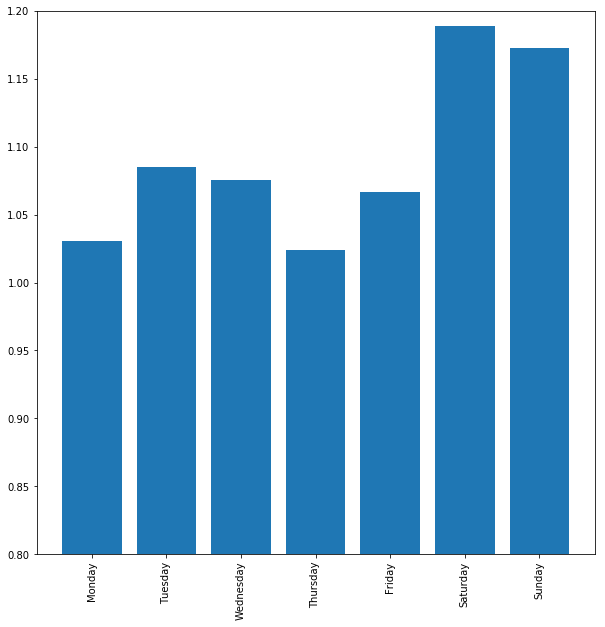

In [26]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(weekdays, week_mean.values())
plt.xticks(rotation='vertical')
plt.ylim(0.8, 1.2)

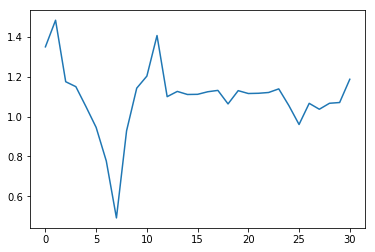

In [14]:
plt.plot(daily_mean.values())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

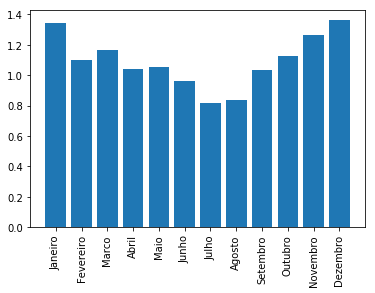

In [15]:
months = ['Janeiro', 'Fevereiro', 'Marco', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
plt.bar(months, monthly_mean.values())
plt.xticks(rotation='vertical')